# Assignment 1 - Reinforcement Learning

In this assignment, we are going to first solve a simple RL exercise by reasoning about a 4-states simple MDP (Markov Decision Process), and afterwards implement a tabular RL agent that acts and (hopefully!) learns how to act in two different environments. 

## Part 1 (3 points)

Suppose you have an MDP with 4 states, numbered from 1 to 4. The possible transitions are: from state 1 to states 2 and 4, from 2 to 1 and 3, from 3 to 1 and 4. Each transition gets you a reward of -1, with 4 being the terminal state.
 
Referring to the course slides, please answer to the questions in the markdown cells below:

1) A: Visualize the MDP (maybe write it down with pen and paper) and come up with the optimal policy (the best actions for each state). 

Answer: 
S = {1, 2, 3, 4}

Possible transitions from each state, i.e $S_{n}$ -> {a, b}

- $S_{1}$ -> {2, 4}

- $S_{2}$ -> {1, 3}

- $S_{3}$ -> {1, 4}

- $S_{4}$ -> terminal state

Same reward in each state is R(s) = -1

Best Policy

- $\pi{(S_1, b)}$

- $\pi{(S_2, \text{a or b})}$

- $\pi{(S_3, b)}$

- $\pi{(S_4, \text{No action)}}$

1) B: How would this change if from state 2, when taking action $a$ (moving from 2 to 1) we had a probability of 0.5 of remaining in state 2 and when taking action $b$ (moving from 2 to 3) we had a probability of 0.3 of remaining in state 2?

- $\pi{(S_2, \text{b})}$

Now we would go take action b because if we choose that action we are not as likly to end up staying in state 2.

2) If now our policy $\pi$ takes us from state 1 to 2, from 2 to 3, and from 3 to 4,
   what is $V_{\pi}$?

$V_{\pi}(4)$ = 0 

$V_{\pi}(3) = -1 + \gamma V_{\pi}(4) = -1$ 

$V_{\pi}(2) = -1 + \gamma V_{\pi}(3) = - 1 - \gamma$

$V_{\pi}(1) = -1 + \gamma V_{\pi}(2) = -1 - \gamma - \gamma^2$


3) Perform one step of synchronous value iteration, considering that $V_1(s)=2, \forall s \in S-\{4\}$, $V_1(4)=0$ (terminal state), $\gamma = 0.99$, and for each state we have uniform probability over the action space.

Here we will use the formula for value iteration: 

$$V_{t+1}(s)=max_{a\in A(s)}\sum_{s^\prime \in S}P(s^\prime|s,a)\left[R(s,a,s^\prime) + \gamma V_t(s^\prime)\right]$$

In the question we also now that we have a uniform probability over the action space and that $\gamma = 0.99$. We are also given the intial value at t=1: $V_1(s)=2, \forall s \in S-\{4\}$, $V_1(4)=0$

- State 1: s = 1

$V_{a_1}(1) = -1 + 0.99*2 = 0.98 $
$V_{a_2}(1) = -1 + 0.99*0 = -1 $

$\Rightarrow V_2(1) = max(0.98, -1) = 0.98$

- State 2: s = 2

$V_{a_1}(2) = -1 + 0.99*2 = 0.98 $
$V_{a_2}(2) = -1 + 0.99*2 = 0.98 $

$\Rightarrow V_2(2) = max(0.98, 0.98) = 0.98$

- State 3: s = 3

$V_{a_1}(3) = -1 + 0.99*2 = 0.98 $
$V_{a_2}(3) = -1 + 0.99*0 = -1 $

$\Rightarrow V_2(3) = max(0.98, -1) = 0.98$

- State 4: s = 4

$\Rightarrow V_2(4) = 0$

4) How do different values of gamma impact RL?

Answer: Different values of gamma impact the agent's behavior. A low gamma value prioritizes immediate rewards over potentially higher future rewards. In the previous question, we used a high gamma value, which means the agent favored potentially higher future reward.

5) The agent starts in state 1 and selects the action to move to state 2. The reward for this transition is -1, and the Q-values are:  $Q(1,2) = -1.5$  and  $Q(1,4) = -0.5$. After arriving at state 2, the agent observes the Q-values:  $Q(2,1) = -2.0$  and  $Q(2,3) = -1.0$. Using a learning rate  $\alpha = 0.1$  and  $\gamma = 0.9$ , calculate the updated value of  $Q(1,2)$.

Answer: Here we will use the update rule for Q-learning: $$Q_{t+1}(s, a) \leftarrow Q_t(s, a) + \alpha \left[ r_t + \gamma \max_{a'} Q_t(s', a') - Q_t(s, a) \right]$$

We are give in the question the current Q value $Q(1,2)=-1.5$, we are also given the Q-values $Q(2,1) = -2.0$  and  $Q(2,3) = -1.0$

$Q_{t+1}(s, a) \leftarrow Q_t(s, a) + \alpha \left[ r_t + \gamma \max_{a'} Q_t(s', a') - Q_t(s, a) \right] = -1.5 + 0.1[-1 - 0.9*1 + 1.5]=-1.54$



6) Describe the trade-off between exploration and exploitation in RL. How does epsilon-greedy attempt to tackle it? Under epsilon-greedy what is the probability of selecting the maximising action?

Answer: The trade-off between exploration and exploitation in reinforcement learning (RL) determines how an agent balances leveraging current knowledge (exploitation) and discovering new, potentially better solutions (exploration). Exploration and exploitation are typically managed through strategies like the epsilon-greedy method. In epsilon-greedy, the agent explores by choosing a random action with probability epsilon, and exploits by selecting the best-known action with probability 1 − epsilon. To decide, the agent draws a random value between 0 and 1. If the random value is less than epsilon, it picks a random action (exploration); otherwise, it chooses the action with the highest estimated reward (exploitation). Thus, the probability of selecting the maximizing action is 1 − epsilon, but it can still be chosen during exploration with lower probability.

## Part 2 (4 points)

Now on to some RL implementation! This first exercise is in a custom environment which we will revisit again in Assignment 3. In this environment, your agent is a sous-chef tasked to prepare different kinds of pancakes. 
At first, we will keep it simple: the only ingredients your agent can play around with are pancake bread, bacon, and sauce, referred to with indices 0,1,2 respectively.

The environment is given a set of recipes at the start, which will be the different goals the agent will randomly receive and try to reconstruct. Each goal is communicated to the agent at the start of an episode as a symbol (an index), which the agent does not have prior knowledge about: imagine that the head chef and your agent do not speak the same language, and that the head chef has left some different sketches for each recipe. Your agent will learn their meaning by interacting with the environment, preparing different pancakes and getting rewarded positively for getting the recipes right and negatively for getting them wrong.

The observation your agent receives is the current pancake they have produced (e.g. [0, 1, 1] is a slice of pancake bread followed by two bacon strips), plus the symbol that represents one of the goals (e.g. 3 for goal 3, which the agent does not know anything about apriori).

The actions your agent has at their disposal is to either position a pancake (0) a bacon strip (1) or some sauce (2).

The episode terminates when the maximum size of the pancake is reached.

At the start, the agent is then given a reward of +1 if it gets it right, -1 if it gets it wrong. This will change later!



In [1]:
#Imports

import numpy as np
import random
import matplotlib.pyplot as plt
import random
from tqdm import trange, tqdm

In [2]:
recipes = []
recipes.append([0,1,2,0,1,2])
recipes.append([0,1,1,0,1,1])
recipes.append([0,1,1,0,2])
recipes.append([0,2,0,2,0,2])
recipes.append([0,1,1,1,1,1])

At the start, we will keep these goals fixed. Later we will ask you to try with different ones.

In [3]:
"""This is the environment for the pancake problem. 
The goal is to create a pancake with the same ingredients as the intended goal."""

class IngredientsActionSpace:
    def __init__(self, n):
        self.n = n  # Number of possible ingredients

    def sample(self): #sample an action
        return random.randint(0, self.n-1) 
    
    def __len__(self):
        return self.n

class PancakeEnv:
    def __init__(self, goals, max_pancake_size=6, partial_reward=False):
        #initialise the environment
        self.goals = goals #list of goals
        self.max_pancake_size = max_pancake_size #maximum number of ingredients in a pancake (including the pancake itself)
        self.action_space = IngredientsActionSpace(3) #0 is the pancake, 1 is the bacon, 2 is the sauce
        self.observation_space() #create the observation space
        self.partial_reward = partial_reward #if we want to give a partial reward


    def reset(self, goal = None): #reset the environment, choose a random goal if none is given
        self.word_for_goal = random.randint(0, len(self.goals)-1) if goal is None else goal #choose a random goal (note that we pass an index, not the actual goal pancake!)
        self.intended_goal = self.goals[self.word_for_goal] #get the actual goal pancake (we won't give it to the agent, but use it for computing the reward)
        self.current_pancake = [0] #we always start with a pancake with no ingredients
        return self.word_for_goal, self.current_pancake

    def step(self, action): #act 1 step in the environment
        self.current_pancake.append(action) #add the ingredient to the pancake
        reward, done = self.compute_reward_and_done() #compute the reward and if the episode is done
        return self.current_pancake, reward, done
        
    def compute_reward_and_done(self):
        if self.current_pancake == self.intended_goal: #we have reached the goal
                return 1, True
        if len(self.current_pancake) == self.max_pancake_size: # we have reached the maximum number of steps
            #if we want to give a partial reward, we compute it here, otherwise we return 0 (failure)
            return 0 if not self.partial_reward else partial_reward(self.intended_goal, self.current_pancake), True
        return 0, False #we are not done yet
        
    
    def observation_space(self):
        # We have all the permutations of pancakes ingredients, from a length of 1 to max_pancake_size. list them all
        # e.g. for max_pancake_size=3, we have
        # [0] [0,0] [0,1] [0,2] [0,0,0] [0,0,1] [0,0,2], [0,1,0]...
        self.observation_space = []
        for i in range(1, self.max_pancake_size+1):
            self.observation_space += self.permutations(i)
    
    def permutations(self, n): #recursive function to get all the permutations of pancakes ingredients
        if n == 1:
            return [[0]]
        perms = []
        for perm in self.permutations(n-1):
            for i in range(3):
                perms.append(perm + [i])
        return perms
    
    def get_observation_index(self, current_pancake): #get the index of the current pancake in the observation space (used for indexing the Q-table)
        return self.observation_space.index(current_pancake)
    
def partial_reward(goal, current_pancake):
    # we give a partial reward based on the number of ingredients that at the right place
    reward = 0
    for i in range(len(goal)):
        if goal[i] == current_pancake[i]:
            reward += 1
    return reward/len(goal)


At first, we start without partial reward, so our agent will be rewarded ONLY if the agent is able to reconstruct the whole pancake. This makes this simple reward actually very hard to learn, as we will see shortly.

In [4]:
env = PancakeEnv(recipes, max_pancake_size=6, partial_reward=False)
env.reset()

(4, [0])

How large is the observation space? And the goal space? What about the action space?

In [5]:
print("Observation space size: ", len(env.observation_space))
print("Goal space size: ", len(env.goals))
print("Action space size: ", len(env.action_space))
goal_index, initial_observation = env.reset()
print("Sample observation: ", initial_observation)

Observation space size:  364
Goal space size:  5
Action space size:  3
Sample observation:  [0]


Try to sample a starting goal and observation!

In [6]:
starting_goal, starting_observation = env.reset()

print("Starting goal: ", starting_goal)
print("Starting Observation: ", starting_observation)

Starting goal:  1
Starting Observation:  [0]


# Q-Learning

Q-Learning is a simple RL model-free algorithm which you have covered in the lecture. 

We have included the algorithm below. Can you implement it? We have implemented some helper functions but you should fill in the rest.

<!-- ![text](algorithm.png) -->
[![Q-learning algorithm](https://miro.medium.com/v2/resize:fit:1400/1*7AWfjw8YDfoRqnIO71DjiA.png)](https://en.wikipedia.org/wiki/Q-learning)

Note that in this case, actions will have different consequences depending on the goal we are aiming to achieve. This means that we cannot have one single Q-table for each goal, or our updates will be conflicting. The first dimension of the Q-table should be the number of goals!

In reality, the goal symbol is actually part of the state space. We keep it separate from the observation space though as it will be easier to index both with what the environment returns us.

In [7]:
def q_table(): #initialise the Q-table
  goals = len(env.goals)  
  observation_space = len(env.observation_space)  
  action_space = len(env.action_space)  
  Qtable = np.zeros((goals, observation_space, action_space))
  return Qtable
    
def greedy_policy(Qtable, goal_index, state_index): #choose the action with the highest Q-value
  q_values = Qtable[goal_index, state_index]
  action = np.argmax(q_values)
  return int(action)

def epsilon_greedy_policy(Qtable, goal_index, state_index, epsilon): #choose a random action with probability epsilon, otherwise choose the greedy action
    q_values = Qtable[goal_index, state_index]

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = greedy_policy(Qtable, goal_index, state_index)
    return int(action)
    
def random_policy(): 
    return env.action_space.sample()
    

Here we provide some parameters for you. Feel free to play around with them and see how good your agent gets!

In [8]:
# Training parameters
n_training_episodes = 500000  # Total training episodes
max_steps = 5 # DO NOT CHANGE: Max steps per episode (ingredients you can place)
learning_rate = 0.3          # Learning rate

# Environment parameters
gamma = 0.90               # Discounting rate


Try to experiment with different $\epsilon$ , and see how much exploration is required to solve this problem. 
A good idea is always to also try a decaying epsilon when fixed epsilons are not doing great, granting more exploration at the start ($\epsilon$ close to 1), and more exploitation towards the end ($\epsilon$ close to 0).


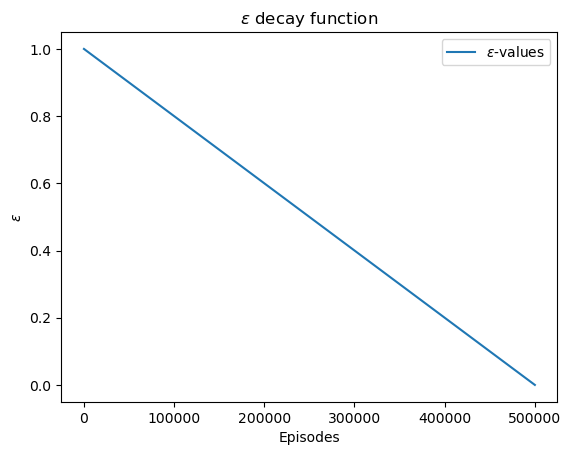

In [9]:
"Optional: implement a function to decay epsilon over time and plot it"

def epsilon_decay(episode, n_training_episodes):
    epsilon = max(0, 1 - (episode / n_training_episodes))
    return epsilon

epsilons = []
for e in range(n_training_episodes):
    epsilons.append(epsilon_decay(e, n_training_episodes))

plt.plot(epsilons, label=r"$\epsilon$-values")
plt.xlabel('Episodes')
plt.ylabel(r'$\epsilon$')
plt.title(r'$\epsilon$ decay function')
plt.legend()
plt.show()

In [10]:
def training_agent(n_training_episodes, max_steps, learning_rate, gamma, partial_reward=False, policy=True):
    env = PancakeEnv(recipes, max_pancake_size=6, partial_reward=partial_reward)
    rewards = []
    Qtable = q_table()
    for episode in trange(n_training_episodes):
        goal, state = env.reset()
        done = False
        for step_n in range(max_steps):
            state_idx = env.get_observation_index(state)
            epsilon = epsilon_decay(episode, n_training_episodes)
            if policy == True:
                action = epsilon_greedy_policy(Qtable, goal, state_idx, epsilon)
            else:
                action = random_policy()
            new_state, reward, done = env.step(action)
            new_state_idx = env.get_observation_index(new_state)
            max_Q = np.max(Qtable[goal, new_state_idx])
            Qtable[goal, state_idx, action] = Qtable[goal, state_idx, action] + learning_rate * (reward + gamma * max_Q - Qtable[goal, state_idx, action])
            state = new_state
            if done:
                rewards.append(reward)
                #print(f"Episode {episode}, reward {reward}")
                break
    return rewards 

rewards_without_partial_reward = training_agent(n_training_episodes, max_steps, learning_rate, gamma, partial_reward=False, policy=True)

100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [00:31<00:00, 15938.46it/s]


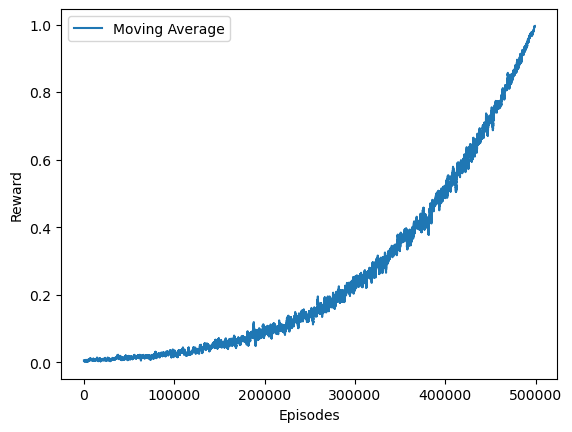

In [11]:
"Plot the rewards - depending on your exploration strategy, the curve might be hard to interpret," 
"try using a moving average to smooth it out" 

def moving_average(x, window_size=None):
    if window_size is None:
        window_size = len(x)//10
    return np.convolve(x, np.ones(window_size), 'valid') / window_size

plt.plot(moving_average(rewards_without_partial_reward, 1000), label='Moving Average')
plt.xlabel('Episodes')
plt.ylabel('Reward')
#plt.plot(rewards, label='Reward')
plt.legend()
plt.show()

Do not worry if you don't manage to get an agent that has perfectly learnt the environment, try to obtain the best reward plot you can get. 

We are going to try change the reward strategy of the environment, meaning that now our agent receives a partial reward at the end of each episode, i.e. the fraction of ingredients that match with the actual ingredient of the recipe.

Try again to train a new Q-learning agent and obtain the rewards plot. Compare the previous plot and this one qualitatively!

*(Optional)* For both environments (with and without partial reward) it can help to be aware of how a random agent would perform on the environment, just to have a very low baseline, to understand if our agent is learning anything. Feel free to use the random_policy() function and plot how the rewards look for it.

In [12]:
# Training parameters
n_training_episodes = 500000  # Total training episodes
max_steps = 5 # DO NOT CHANGE: Max steps per episode (ingredients you can place)
learning_rate = 0.3          # Learning rate
# Environment parameters
gamma = 0.8              # Discounting rate


rewards_with_partial_reward = training_agent(n_training_episodes, max_steps, learning_rate, gamma, partial_reward=True, policy=True)

100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [00:33<00:00, 15130.02it/s]


In [13]:
# Training parameters
n_training_episodes = 500000  # Total training episodes
max_steps = 5 # DO NOT CHANGE: Max steps per episode (ingredients you can place)
learning_rate = 0.3          # Learning rate
# Environment parameters
gamma = 0.8              # Discounting rate

rewards_random_policy_partial_reward = training_agent(n_training_episodes, max_steps, learning_rate, gamma, partial_reward=True, policy=False)
rewards_random_policy_NoPArtial_reward = training_agent(n_training_episodes, max_steps, learning_rate, gamma, partial_reward=False, policy=False)

100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [00:25<00:00, 19448.00it/s]


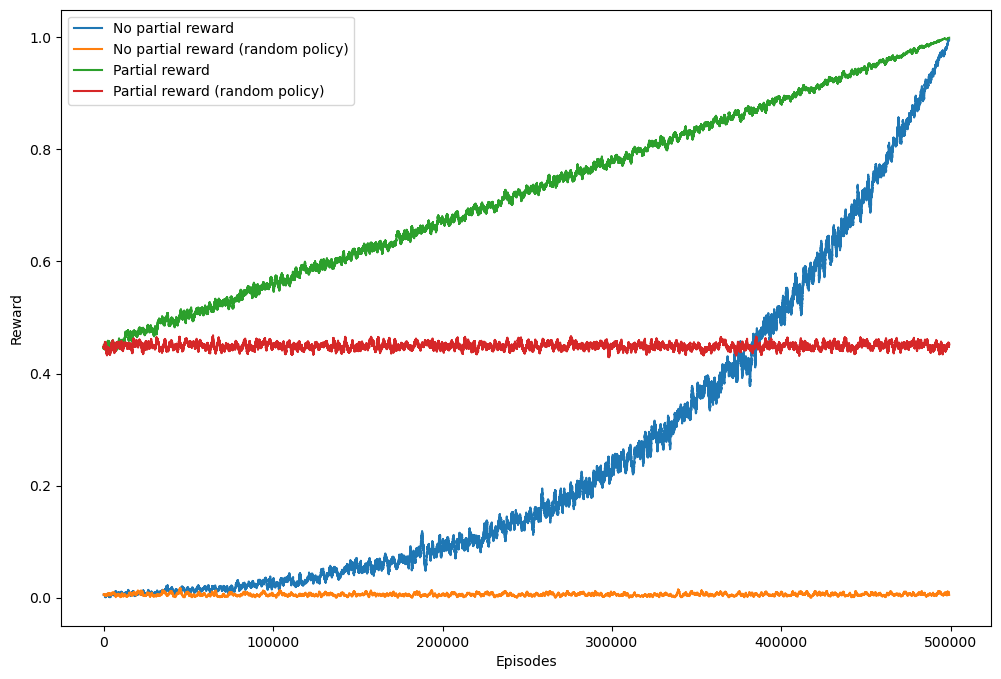

In [14]:
def moving_average(x, window_size=None):
    if window_size is None:
        window_size = len(x)//10
    return np.convolve(x, np.ones(window_size), 'valid') / window_size

plt.figure(figsize=(12, 8))
plt.plot(moving_average(rewards_without_partial_reward, 1000), label='No partial reward')
plt.plot(moving_average(rewards_random_policy_NoPArtial_reward, 1000), label='No partial reward (random policy)')
plt.plot(moving_average(rewards_with_partial_reward, 1000), label='Partial reward')
plt.plot(moving_average(rewards_random_policy_partial_reward, 1000), label='Partial reward (random policy)')
plt.xlabel('Episodes')
plt.ylabel('Reward')
#plt.plot(rewards, label='Reward')
plt.legend()
plt.show()


# Part 3: Blackjack! (3 points)

For those that are unfamiliar, blackjack is a common card game. There are (at least) two-agents, the dealer and the player. In our case, at the beginning of the game the dealer gives our agent one card. The dealer's card is placed face up. The dealer also gets two cards: one is face up, the other face down. 
The player observes their own card and the dealer's card and must decide to 'hit' (i.e. get a new card) or to 'stick'(i.e. keep the hand that they've got). 

If the player selects 'stick' it is then the dealers turn, which will turn the hidden card face-up, and then hit until their sum is at least or they bust (they go over 21). The goal is to beat the dealer, i.e. get a higher sum than them without busting ourselves.

This environment comes from the popular gymnasium library, which has a lot of different RL environments for you to try. You can read more info about this environment and the rules of blackjack it follows at https://gymnasium.farama.org/environments/toy_text/blackjack/.

Here are the main points:

**Action Space**

There are two actions: stick (0), and hit (1).

**Observation Space**

The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

**Rewards**

win game: +1

lose game: -1

draw game: 0


[![Blackjack!](https://www.gymlibrary.dev/_images/blackjack.gif)]

In [15]:
#!pip install gym
import gym
#import gymnasium as gym

In [16]:
env = gym.make("Blackjack-v1", sab=True)

action_size = env.action_space.n
state_size = env.observation_space
print(f"Number of states: {state_size}, Number of actions: {action_size}")

Number of states: Tuple(Discrete(32), Discrete(11), Discrete(2)), Number of actions: 2


In [41]:
from tqdm import trange
# again, hyperparameters that you can change
learning_rate = 0.08
n_training_episodes = 500000 # you can try also 1000000, it might take a while
gamma = 0.99

In [18]:
state, _ = env.reset()
print(f"Initial state: {state}")

Initial state: (20, 7, False)


Note above how the observation looks. As we said before, the states are tuples of 3 values. Modify the functions defining the Q-table and your policies accordingly (if needed), keeping in mind we will need to store 2 q-values for each combination of these values, since we have two actions.

P.S. Note that you can reuse a lot of code from Part 2, and you are also encouraged to!

In [19]:
import random

def q_table(): #initialise the Q-table
    Qtable = {}
    for i in range(4, 32):  
        for j in range(1, 11): 
            for k in [True, False]:
                Qtable[(i, j, k)] = {0: 0.0, 1: 0.0} 
    return Qtable
    
def greedy_policy(Qtable, state): #choose the action with the highest Q-value
    action = max(Qtable[state], key=Qtable[state].get)
    return int(action)

def epsilon_greedy_policy(Qtable, state, epsilon): #choose a random action with probability epsilon, otherwise choose the greedy action
    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = greedy_policy(Qtable, state)
    return int(action)
    
def random_policy(): 
    return env.action_space.sample()

In [42]:
rewards = []
Qtable = q_table()
for episode in trange(n_training_episodes):
    state, _ = env.reset()
    done = False
    cur_reward = 0
    while not done:
        epsilon = epsilon_decay(episode, n_training_episodes)
        action = epsilon_greedy_policy(Qtable, state, epsilon)
        new_state, reward, terminated, truncated, _ = env.step(action)
        cur_reward += reward
        Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * max(Qtable[new_state].values()) - Qtable[state][action])
        state = new_state
        done = terminated or truncated
        if done:
            rewards.append(cur_reward)
            break

100%|████████████████████████████████████████████████████████████████████████| 500000/500000 [01:08<00:00, 7297.99it/s]


Let's plot the rewards and see if the agent is learning something. Again, it might be a good idea to plot a moving average of your rewards, as depending on your exploration tactic the reward might be very noisy.

What result do you get? Does it seem reasonable given our expectations knowing the blackjack game (the dealer always have the advantage)?

### Answer

Our agent performs slightly worse than the dealer overall, which is reasonable considering the inherent advantage the dealer holds. However, when compared to the expected results of a perfect Blackjack strategy, our agent performs worse. A perfect strategy would yield a result of approximately -0.005 [source: https://doppelwetten.com/perfect-blackjack-strategy/]. This suggests that our agent has not yet learned the optimal strategies, and the hyperparameters likely need adjustment to facilitate better learning.

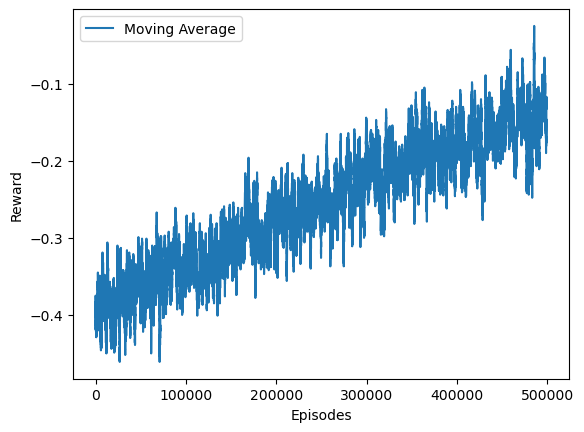

In [43]:
# Plot the rewards

def moving_average(x, window_size=None):
    if window_size is None:
        window_size = len(x)//10
    return np.convolve(x, np.ones(window_size), 'valid') / window_size

plt.plot(moving_average(rewards, 1000), label='Moving Average')
plt.xlabel('Episodes')
plt.ylabel('Reward')
#plt.plot(rewards, label='Reward')
plt.legend()
plt.show()

Let's try to see how good our agent is! Try to see what the average reward your agent gets in 100 episodes.
(What is the difference from the training loop above? Since we are now testing, do we want to update the Qtable? Also, what is the policy we want to use now?)

### Answer

The diffrence in the loop above is that now we want to follow our Q-table and select the best action depending on the Q-values. Therefore we do not want to explore other solution therefore our policy will strictly be to exploit the solutions we have already found so we will take the action the has the largest Q-value. We will also not update the Q-table here.

In [50]:
# Test the agent, get the average reward

testing_episodes = 100
rewards_test = []
for episode in trange(testing_episodes):
    state, _ = env.reset()
    done = False
    cur_reward = 0
    while not done:
        action = greedy_policy(Qtable, state)
        new_state, reward, terminated, truncated, _ = env.step(action)
        cur_reward += reward
        state = new_state
        done = terminated or truncated
        if done:
            rewards_test.append(cur_reward)
            break
print('Average Reward in 100 episodes: ', sum(rewards_test)/testing_episodes)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6754.00it/s]

Average Reward in 100 episodes:  -0.05


## Visualize the agent's policy

Note that this code works with the Q-table being represented as a dictionary with keys being the observations and values being numpy arrays of length 2 (one element for each action). If you have represented your Q-table as an n-dimensional array, you might have to modify the create_grids function (or change the Q-table representation to a dictionary).

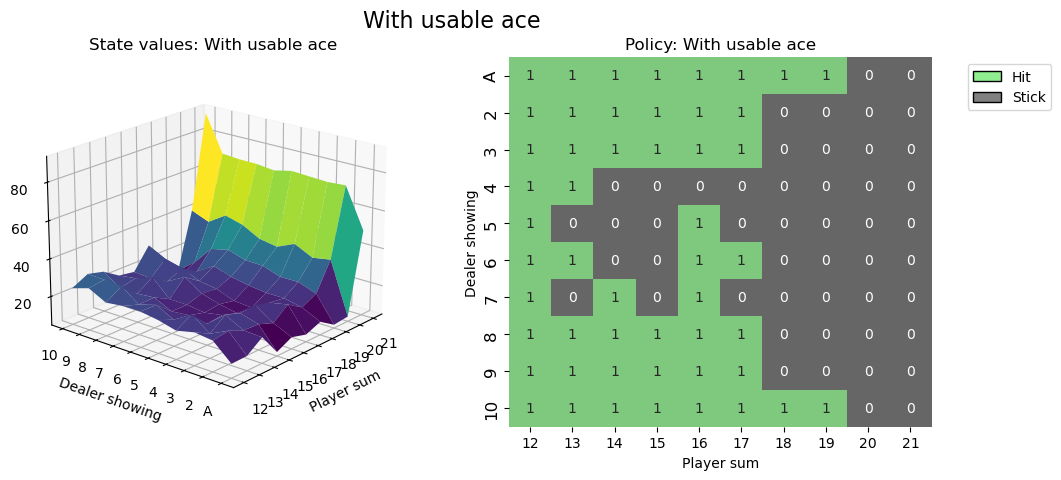

In [51]:
#!pip install seaborn #uncomment if you haven't installed seaborn yet

from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def create_grids(Qtable, usable_ace=False):
    """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions
    state_value = defaultdict(float)
    policy = defaultdict(int)

    for state, action_values in Qtable.items():
        # Check if the state has the correct usable_ace value
        if state[2] == usable_ace:
            state_value[state[:2]] = max(action_values.values())  # Max Q-value
            policy[state[:2]] = max(action_values, key=action_values.get)  # Best action

    player_count, dealer_count = np.meshgrid(
        # player's count, dealer's face-up card
        np.arange(12, 22),
        np.arange(1, 11),
    )

    # create the value grid for plotting
    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1]), 0),  # Default to 0 if state not in Qtable
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    value_grid = player_count, dealer_count, value

    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1]), 0),  # Default action to 0 (Hit) if state not in Qtable
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return value_grid, policy_grid

def create_plots(value_grid, policy_grid, title: str):
    #Creates a plot using a value and policy grid.
    # create a new figure with 2 subplots (left: state values, right: policy)
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    # plot the state values
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none",
    )
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig


# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(Qtable, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

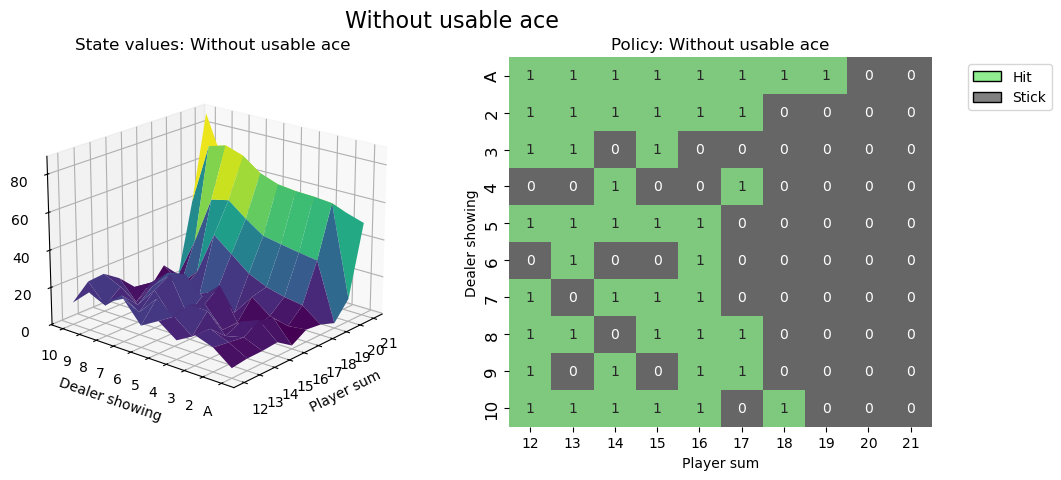

In [52]:
# state values & policy without usable ace (ace counts as 1)
value_grid, policy_grid = create_grids(Qtable, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

Can you see some patterns in the value function and policy plots of your agents? What is the difference between when we have a usable ace or not at the start? Comment below: